# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from modules.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `modules/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X)
print(y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
[0 1 2 2 1]


# Forward pass: compute scores
Open the file `modules/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from modules.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

iteration [0 / 100] : loss = 1.241994
iteration [1 / 100] : loss = 0.911191
iteration [2 / 100] : loss = 0.727970
iteration [3 / 100] : loss = 0.587932
iteration [4 / 100] : loss = 0.443400
iteration [5 / 100] : loss = 0.321233
iteration [6 / 100] : loss = 0.229577
iteration [7 / 100] : loss = 0.191958
iteration [8 / 100] : loss = 0.142653
iteration [9 / 100] : loss = 0.122731
iteration [10 / 100] : loss = 0.092965
iteration [11 / 100] : loss = 0.077945
iteration [12 / 100] : loss = 0.072626
iteration [13 / 100] : loss = 0.065361
iteration [14 / 100] : loss = 0.054620
iteration [15 / 100] : loss = 0.045523
iteration [16 / 100] : loss = 0.047018
iteration [17 / 100] : loss = 0.042983
iteration [18 / 100] : loss = 0.037004
iteration [19 / 100] : loss = 0.036127
iteration [20 / 100] : loss = 0.036055
iteration [21 / 100] : loss = 0.032943
iteration [22 / 100] : loss = 0.030061
iteration [23 / 100] : loss = 0.031595
iteration [24 / 100] : loss = 0.028289
iteration [25 / 100] : loss = 0.029

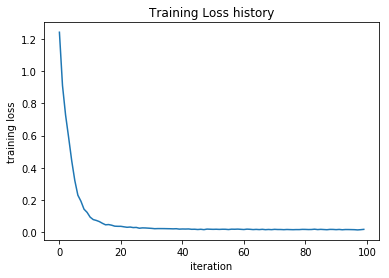

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from modules.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration [0 / 1000] : loss = 2.302954
iteration [1 / 1000] : loss = 2.302974
iteration [2 / 1000] : loss = 2.302955
iteration [3 / 1000] : loss = 2.302974
iteration [4 / 1000] : loss = 2.302966
iteration [5 / 1000] : loss = 2.302963
iteration [6 / 1000] : loss = 2.302955
iteration [7 / 1000] : loss = 2.302961
iteration [8 / 1000] : loss = 2.302956
iteration [9 / 1000] : loss = 2.302953
iteration [10 / 1000] : loss = 2.302967
iteration [11 / 1000] : loss = 2.302961
iteration [12 / 1000] : loss = 2.302954
iteration [13 / 1000] : loss = 2.302962
iteration [14 / 1000] : loss = 2.302951
iteration [15 / 1000] : loss = 2.302944
iteration [16 / 1000] : loss = 2.302974
iteration [17 / 1000] : loss = 2.302951
iteration [18 / 1000] : loss = 2.302946
iteration [19 / 1000] : loss = 2.302960
iteration [20 / 1000] : loss = 2.302937
iteration [21 / 1000] : loss = 2.302942
iteration [22 / 1000] : loss = 2.302916
iteration [23 / 1000] : loss = 2.302934
iteration [24 / 1000] : loss = 2.302931
iteration 

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

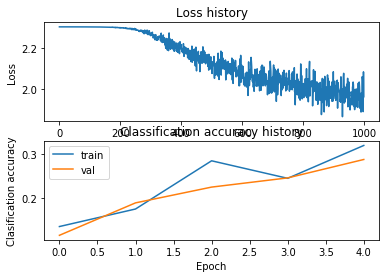

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

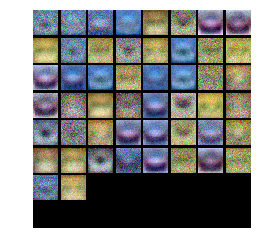

In [10]:
from modules.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

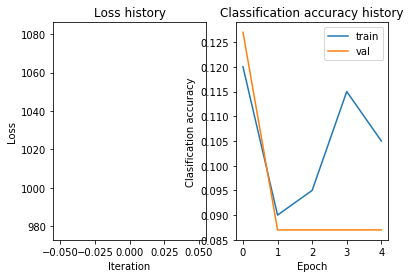

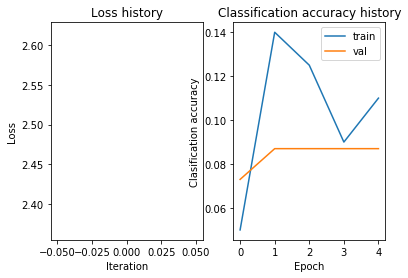

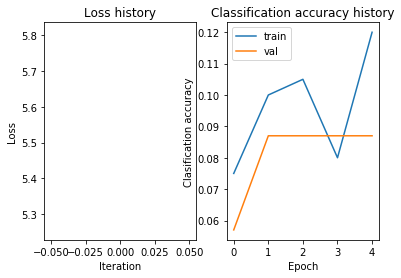

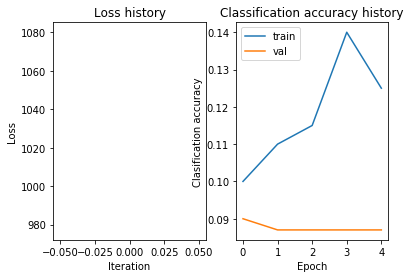

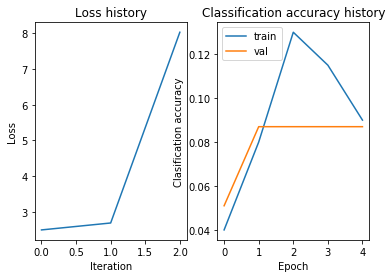

KeyboardInterrupt: 

In [14]:
#################################################################################
# Tune hyperparameters using the validation set. Store your best trained        #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

best_net = None # store the best model into this 
best_val_acc = -1
results = {}

lr_array = []
reg_array = []
h1_size_array = []

input_size = 32*32*3
output_size = 10

X = X_train
y = y_train
X_val = X_val
y_val = y_val

num_train_epochs = 3

for i in range(num_train_epochs):
    lr_array.append(10**np.random.uniform(-5, 5))
    reg_array.append(10**np.random.uniform(-3, 6))
    h1_size_array.append(np.random.randint(1, 500))

for h1_size in h1_size_array:
    for lr in lr_array:
        for reg in reg_array:
            net = TwoLayerNet(input_size=input_size, hidden_size=h1_size, output_size=output_size)
            stats = net.train(X, y, X_val, y_val, num_iters=1000, learning_rate=lr, reg=reg, verbose=False)

            val_acc = np.mean(net.predict(X_val) == y_val)
            results[(h1_size, lr, reg)] = val_acc

            plt.subplot(1, 2, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(1, 2, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.legend()
            plt.show()

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net
            else:
                del net
                del stats

for h1_size, lr, reg in results:
    val_acc = results[(h1_size, lr, reg)]
    print('h1_size: %d | lr: %f | reg: %f |>>>| val_acc = %f' %(h1_size, lr, reg, val_acc))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

START...............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
hyper-params sampling DONE..............
STARTING the TRAINING procedure............
iteration [0 / 1000] : loss = 2.302590
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf

modules/classifiers/neural_net.py:102: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-1*np.log(scores_exp_norm[np.arange(N), y]))
modules/classifiers/neural_net.py:97: RuntimeWarning: invalid value encountered in subtract
  scores -= np.transpose([np.max(scores, axis=1)])    # normalization trick to prevent exponentiation boom
modules/classifiers/neural_net.py:104: RuntimeWarning: overflow encountered in multiply
  loss += reg * (np.sum(W1*W1) + np.sum(W2*W2))       # L2 regularization
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : loss = nan
iteration [29 / 1000] : loss = nan
iteration [30 / 1000] : loss = nan
iteration [31 / 1000] : loss = nan
iteration [32 / 1000] : loss = nan
iteration [33 / 1000] : loss = nan
iteration [34 / 1000] : loss = nan
iteration [35 / 1000] : loss = nan
iteration [36 / 1000] : loss = nan
iteration [37 / 1000] : loss = nan
iteration [38 / 1000] : loss = nan
iteration [39 / 1000] : loss = nan
iteration [40 / 1000] : loss = nan
iteration [41 / 1000] : loss = nan
iteration [42 / 1000] : loss = nan
iteration [43 / 1000] : loss = nan


/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
modules/classifiers/neural_net.py:123: RuntimeWarning: invalid value encountered in greater
  mask_ReLU = scores_h1 > 0


iteration [44 / 1000] : loss = nan
iteration [45 / 1000] : loss = nan
iteration [46 / 1000] : loss = nan
iteration [47 / 1000] : loss = nan
iteration [48 / 1000] : loss = nan
iteration [49 / 1000] : loss = nan
iteration [50 / 1000] : loss = nan
iteration [51 / 1000] : loss = nan
iteration [52 / 1000] : loss = nan
iteration [53 / 1000] : loss = nan
iteration [54 / 1000] : loss = nan
iteration [55 / 1000] : loss = nan
iteration [56 / 1000] : loss = nan
iteration [57 / 1000] : loss = nan
iteration [58 / 1000] : loss = nan
iteration [59 / 1000] : loss = nan
iteration [60 / 1000] : loss = nan
iteration [61 / 1000] : loss = nan
iteration [62 / 1000] : loss = nan
iteration [63 / 1000] : loss = nan
iteration [64 / 1000] : loss = nan
iteration [65 / 1000] : loss = nan
iteration [66 / 1000] : loss = nan
iteration [67 / 1000] : loss = nan
iteration [68 / 1000] : loss = nan
iteration [69 / 1000] : loss = nan
iteration [70 / 1000] : loss = nan
iteration [71 / 1000] : loss = nan
iteration [72 / 1000

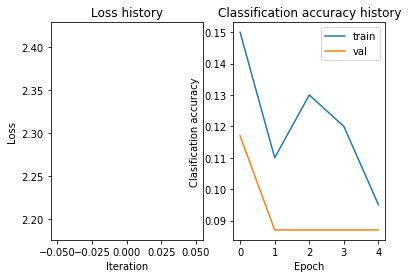

iteration [0 / 1000] : loss = 2.348881
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan


modules/classifiers/neural_net.py:97: RuntimeWarning: overflow encountered in subtract
  scores -= np.transpose([np.max(scores, axis=1)])    # normalization trick to prevent exponentiation boom


iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : loss = nan
iteration [29 / 1000] : loss = nan
iteration [30 / 1000] : loss = nan
iteration [31 / 1000] : loss = nan
iteration [32 / 1000] : loss = nan
iteration [33 / 1000] : loss = nan
iteration [34 / 1000] : loss = nan
iteration [35 / 1000] : loss = nan
iteration [36 / 1000] : loss = nan
iteration [37 / 1000] : loss = nan
iteration [38 / 1000] : loss = nan
iteration [39 / 1000] : loss = nan
iteration [40 / 1000] : loss = nan
iteration [41 / 1000] : loss = nan
iteration [42 / 1000] : loss = nan
iteration [43 / 1000] : loss = nan
iteration [44 / 1000] : loss = nan
iteration [45 / 1000] : loss = nan
iteration [46 / 1000] : loss = nan
iteration [47 / 1000] : loss = nan
iteration [48 / 1000] : loss = nan
iteration [49 / 1000] : loss = nan
iteration [50 / 1000] : loss = nan
iteration [51 / 1000] : loss = nan
iteration [52 / 1000] : loss = nan
iteration [53 / 1000] : loss = nan
iteration [54 / 1000] : loss = nan
iteration [55 / 1000

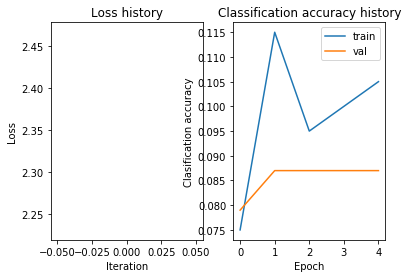

iteration [0 / 1000] : loss = 2.648560
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

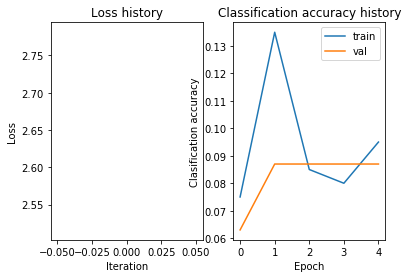

iteration [0 / 1000] : loss = 2.383152
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

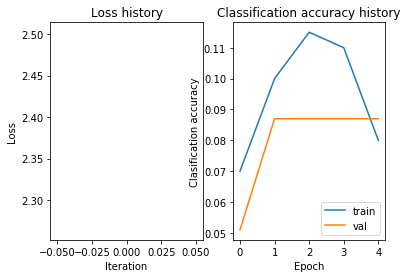

iteration [0 / 1000] : loss = 6.764845
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

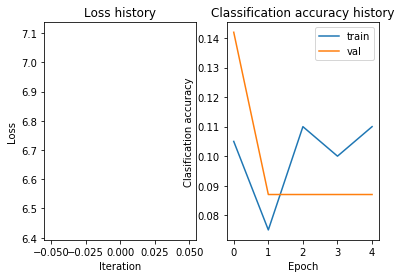

iteration [0 / 1000] : loss = 2.302608
iteration [1 / 1000] : loss = 2.302606
iteration [2 / 1000] : loss = 2.302592
iteration [3 / 1000] : loss = 2.302587
iteration [4 / 1000] : loss = 2.302589
iteration [5 / 1000] : loss = 2.302587
iteration [6 / 1000] : loss = 2.302582
iteration [7 / 1000] : loss = 2.302591
iteration [8 / 1000] : loss = 2.302581
iteration [9 / 1000] : loss = 2.302560
iteration [10 / 1000] : loss = 2.302581
iteration [11 / 1000] : loss = 2.302577
iteration [12 / 1000] : loss = 2.302545
iteration [13 / 1000] : loss = 2.302566
iteration [14 / 1000] : loss = 2.302579
iteration [15 / 1000] : loss = 2.302556
iteration [16 / 1000] : loss = 2.302554
iteration [17 / 1000] : loss = 2.302548
iteration [18 / 1000] : loss = 2.302565
iteration [19 / 1000] : loss = 2.302545
iteration [20 / 1000] : loss = 2.302552
iteration [21 / 1000] : loss = 2.302552
iteration [22 / 1000] : loss = 2.302544
iteration [23 / 1000] : loss = 2.302555
iteration [24 / 1000] : loss = 2.302559
iteration 

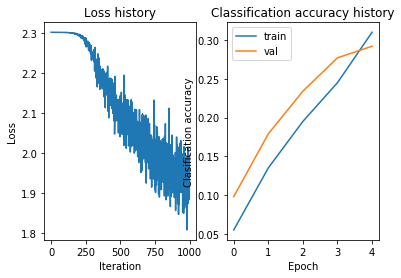

iteration [0 / 1000] : loss = 2.348887
iteration [1 / 1000] : loss = 2.348279
iteration [2 / 1000] : loss = 2.347690
iteration [3 / 1000] : loss = 2.347125
iteration [4 / 1000] : loss = 2.346550
iteration [5 / 1000] : loss = 2.345987
iteration [6 / 1000] : loss = 2.345440
iteration [7 / 1000] : loss = 2.344906
iteration [8 / 1000] : loss = 2.344368
iteration [9 / 1000] : loss = 2.343820
iteration [10 / 1000] : loss = 2.343282
iteration [11 / 1000] : loss = 2.342786
iteration [12 / 1000] : loss = 2.342247
iteration [13 / 1000] : loss = 2.341752
iteration [14 / 1000] : loss = 2.341251
iteration [15 / 1000] : loss = 2.340775
iteration [16 / 1000] : loss = 2.340268
iteration [17 / 1000] : loss = 2.339822
iteration [18 / 1000] : loss = 2.339331
iteration [19 / 1000] : loss = 2.338847
iteration [20 / 1000] : loss = 2.338389
iteration [21 / 1000] : loss = 2.337927
iteration [22 / 1000] : loss = 2.337478
iteration [23 / 1000] : loss = 2.337037
iteration [24 / 1000] : loss = 2.336598
iteration 

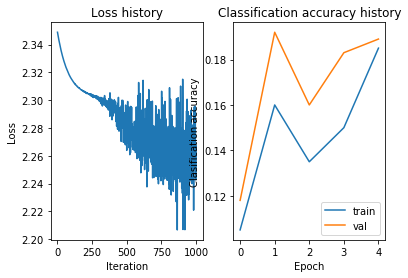

iteration [0 / 1000] : loss = 2.650255
iteration [1 / 1000] : loss = 2.616306
iteration [2 / 1000] : loss = 2.587164
iteration [3 / 1000] : loss = 2.560721
iteration [4 / 1000] : loss = 2.536749
iteration [5 / 1000] : loss = 2.514993
iteration [6 / 1000] : loss = 2.495267
iteration [7 / 1000] : loss = 2.477364
iteration [8 / 1000] : loss = 2.461138
iteration [9 / 1000] : loss = 2.446400
iteration [10 / 1000] : loss = 2.433042
iteration [11 / 1000] : loss = 2.420929
iteration [12 / 1000] : loss = 2.409937
iteration [13 / 1000] : loss = 2.399968
iteration [14 / 1000] : loss = 2.390923
iteration [15 / 1000] : loss = 2.382718
iteration [16 / 1000] : loss = 2.375271
iteration [17 / 1000] : loss = 2.368522
iteration [18 / 1000] : loss = 2.362403
iteration [19 / 1000] : loss = 2.356844
iteration [20 / 1000] : loss = 2.351805
iteration [21 / 1000] : loss = 2.347233
iteration [22 / 1000] : loss = 2.343084
iteration [23 / 1000] : loss = 2.339325
iteration [24 / 1000] : loss = 2.335914
iteration 

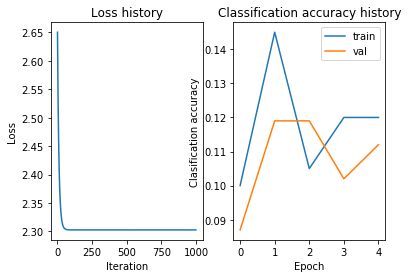

iteration [0 / 1000] : loss = 2.384072
iteration [1 / 1000] : loss = 2.382172
iteration [2 / 1000] : loss = 2.380412
iteration [3 / 1000] : loss = 2.378704
iteration [4 / 1000] : loss = 2.377009
iteration [5 / 1000] : loss = 2.375353
iteration [6 / 1000] : loss = 2.373737
iteration [7 / 1000] : loss = 2.372162
iteration [8 / 1000] : loss = 2.370650
iteration [9 / 1000] : loss = 2.369126
iteration [10 / 1000] : loss = 2.367654
iteration [11 / 1000] : loss = 2.366227
iteration [12 / 1000] : loss = 2.364817
iteration [13 / 1000] : loss = 2.363447
iteration [14 / 1000] : loss = 2.362084
iteration [15 / 1000] : loss = 2.360758
iteration [16 / 1000] : loss = 2.359471
iteration [17 / 1000] : loss = 2.358219
iteration [18 / 1000] : loss = 2.356992
iteration [19 / 1000] : loss = 2.355793
iteration [20 / 1000] : loss = 2.354595
iteration [21 / 1000] : loss = 2.353447
iteration [22 / 1000] : loss = 2.352327
iteration [23 / 1000] : loss = 2.351237
iteration [24 / 1000] : loss = 2.350153
iteration 

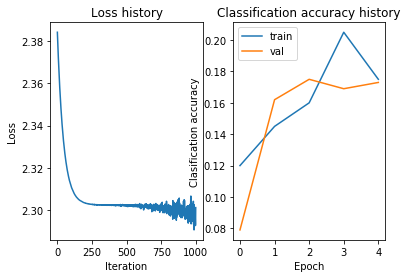

iteration [0 / 1000] : loss = 6.790331
iteration [1 / 1000] : loss = 2.855691
iteration [2 / 1000] : loss = 2.383941
iteration [3 / 1000] : loss = 2.314551
iteration [4 / 1000] : loss = 2.304345
iteration [5 / 1000] : loss = 2.302844
iteration [6 / 1000] : loss = 2.302623
iteration [7 / 1000] : loss = 2.302591
iteration [8 / 1000] : loss = 2.302587
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302585
iteration [12 / 1000] : loss = 2.302585
iteration [13 / 1000] : loss = 2.302586
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302585
iteration [16 / 1000] : loss = 2.302585
iteration [17 / 1000] : loss = 2.302584
iteration [18 / 1000] : loss = 2.302585
iteration [19 / 1000] : loss = 2.302585
iteration [20 / 1000] : loss = 2.302585
iteration [21 / 1000] : loss = 2.302584
iteration [22 / 1000] : loss = 2.302585
iteration [23 / 1000] : loss = 2.302586
iteration [24 / 1000] : loss = 2.302586
iteration 

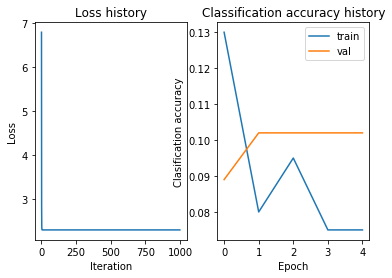

iteration [0 / 1000] : loss = 2.302603
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

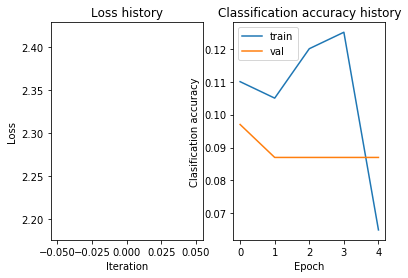

iteration [0 / 1000] : loss = 2.348891
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

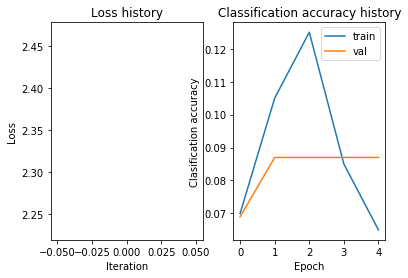

iteration [0 / 1000] : loss = 2.649225
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

modules/classifiers/neural_net.py:104: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * (np.sum(W1*W1) + np.sum(W2*W2))       # L2 regularization


iteration [37 / 1000] : loss = nan
iteration [38 / 1000] : loss = nan
iteration [39 / 1000] : loss = nan
iteration [40 / 1000] : loss = nan
iteration [41 / 1000] : loss = nan
iteration [42 / 1000] : loss = nan
iteration [43 / 1000] : loss = nan
iteration [44 / 1000] : loss = nan
iteration [45 / 1000] : loss = nan
iteration [46 / 1000] : loss = nan
iteration [47 / 1000] : loss = nan
iteration [48 / 1000] : loss = nan
iteration [49 / 1000] : loss = nan
iteration [50 / 1000] : loss = nan
iteration [51 / 1000] : loss = nan
iteration [52 / 1000] : loss = nan
iteration [53 / 1000] : loss = nan
iteration [54 / 1000] : loss = nan
iteration [55 / 1000] : loss = nan
iteration [56 / 1000] : loss = nan
iteration [57 / 1000] : loss = nan
iteration [58 / 1000] : loss = nan
iteration [59 / 1000] : loss = nan
iteration [60 / 1000] : loss = nan
iteration [61 / 1000] : loss = nan
iteration [62 / 1000] : loss = nan
iteration [63 / 1000] : loss = nan
iteration [64 / 1000] : loss = nan
iteration [65 / 1000

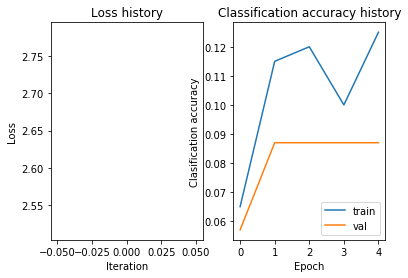

iteration [0 / 1000] : loss = 2.383449
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

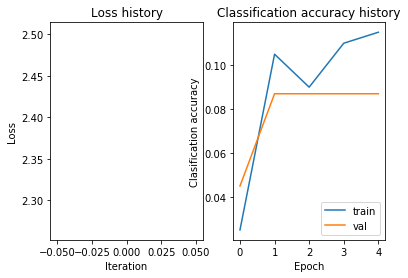

iteration [0 / 1000] : loss = 6.781950
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

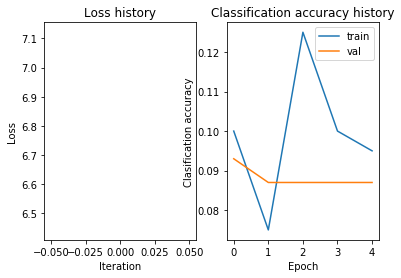

iteration [0 / 1000] : loss = 2.302611
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

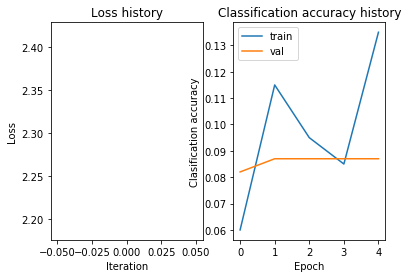

iteration [0 / 1000] : loss = 2.349240
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

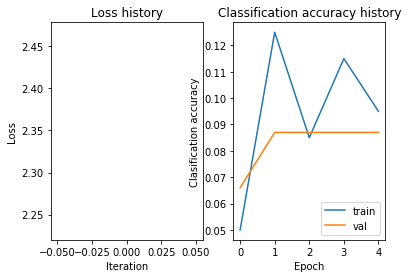

iteration [0 / 1000] : loss = 2.650377
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

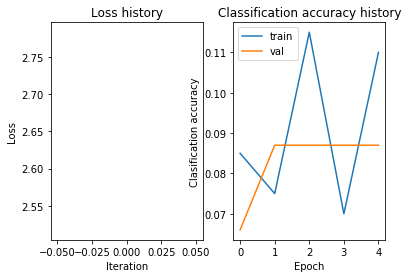

iteration [0 / 1000] : loss = 2.382781
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

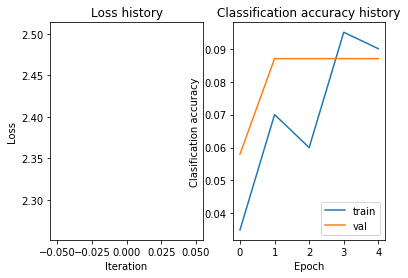

iteration [0 / 1000] : loss = 6.780211
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

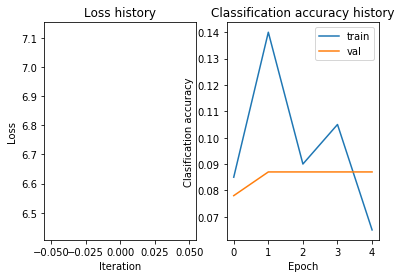

iteration [0 / 1000] : loss = 2.302583
iteration [1 / 1000] : loss = 2.302594
iteration [2 / 1000] : loss = 2.302595
iteration [3 / 1000] : loss = 2.302585
iteration [4 / 1000] : loss = 2.302568
iteration [5 / 1000] : loss = 2.302582
iteration [6 / 1000] : loss = 2.302561
iteration [7 / 1000] : loss = 2.302570
iteration [8 / 1000] : loss = 2.302572
iteration [9 / 1000] : loss = 2.302552
iteration [10 / 1000] : loss = 2.302548
iteration [11 / 1000] : loss = 2.302574
iteration [12 / 1000] : loss = 2.302512
iteration [13 / 1000] : loss = 2.302543
iteration [14 / 1000] : loss = 2.302546
iteration [15 / 1000] : loss = 2.302555
iteration [16 / 1000] : loss = 2.302522
iteration [17 / 1000] : loss = 2.302512
iteration [18 / 1000] : loss = 2.302516
iteration [19 / 1000] : loss = 2.302497
iteration [20 / 1000] : loss = 2.302519
iteration [21 / 1000] : loss = 2.302494
iteration [22 / 1000] : loss = 2.302496
iteration [23 / 1000] : loss = 2.302500
iteration [24 / 1000] : loss = 2.302493
iteration 

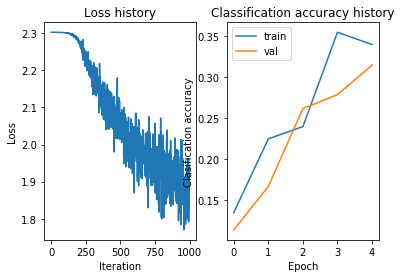

iteration [0 / 1000] : loss = 2.348658
iteration [1 / 1000] : loss = 2.347922
iteration [2 / 1000] : loss = 2.347235
iteration [3 / 1000] : loss = 2.346561
iteration [4 / 1000] : loss = 2.345894
iteration [5 / 1000] : loss = 2.345230
iteration [6 / 1000] : loss = 2.344599
iteration [7 / 1000] : loss = 2.343959
iteration [8 / 1000] : loss = 2.343333
iteration [9 / 1000] : loss = 2.342724
iteration [10 / 1000] : loss = 2.342112
iteration [11 / 1000] : loss = 2.341515
iteration [12 / 1000] : loss = 2.340942
iteration [13 / 1000] : loss = 2.340347
iteration [14 / 1000] : loss = 2.339778
iteration [15 / 1000] : loss = 2.339211
iteration [16 / 1000] : loss = 2.338662
iteration [17 / 1000] : loss = 2.338132
iteration [18 / 1000] : loss = 2.337579
iteration [19 / 1000] : loss = 2.337059
iteration [20 / 1000] : loss = 2.336548
iteration [21 / 1000] : loss = 2.336028
iteration [22 / 1000] : loss = 2.335524
iteration [23 / 1000] : loss = 2.335021
iteration [24 / 1000] : loss = 2.334531
iteration 

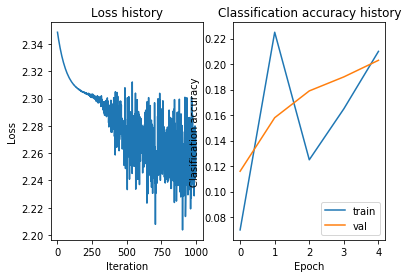

iteration [0 / 1000] : loss = 2.648186
iteration [1 / 1000] : loss = 2.608353
iteration [2 / 1000] : loss = 2.574835
iteration [3 / 1000] : loss = 2.544965
iteration [4 / 1000] : loss = 2.518391
iteration [5 / 1000] : loss = 2.494716
iteration [6 / 1000] : loss = 2.473651
iteration [7 / 1000] : loss = 2.454898
iteration [8 / 1000] : loss = 2.438198
iteration [9 / 1000] : loss = 2.423324
iteration [10 / 1000] : loss = 2.410083
iteration [11 / 1000] : loss = 2.398294
iteration [12 / 1000] : loss = 2.387797
iteration [13 / 1000] : loss = 2.378455
iteration [14 / 1000] : loss = 2.370137
iteration [15 / 1000] : loss = 2.362727
iteration [16 / 1000] : loss = 2.356133
iteration [17 / 1000] : loss = 2.350260
iteration [18 / 1000] : loss = 2.345032
iteration [19 / 1000] : loss = 2.340376
iteration [20 / 1000] : loss = 2.336235
iteration [21 / 1000] : loss = 2.332546
iteration [22 / 1000] : loss = 2.329258
iteration [23 / 1000] : loss = 2.326335
iteration [24 / 1000] : loss = 2.323730
iteration 

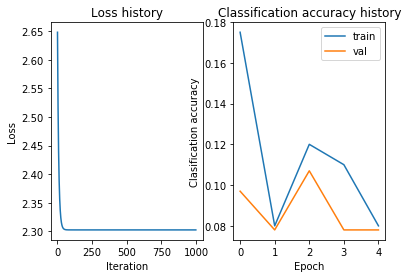

iteration [0 / 1000] : loss = 2.383501
iteration [1 / 1000] : loss = 2.381261
iteration [2 / 1000] : loss = 2.379196
iteration [3 / 1000] : loss = 2.377176
iteration [4 / 1000] : loss = 2.375238
iteration [5 / 1000] : loss = 2.373328
iteration [6 / 1000] : loss = 2.371470
iteration [7 / 1000] : loss = 2.369675
iteration [8 / 1000] : loss = 2.367920
iteration [9 / 1000] : loss = 2.366204
iteration [10 / 1000] : loss = 2.364526
iteration [11 / 1000] : loss = 2.362903
iteration [12 / 1000] : loss = 2.361330
iteration [13 / 1000] : loss = 2.359793
iteration [14 / 1000] : loss = 2.358291
iteration [15 / 1000] : loss = 2.356816
iteration [16 / 1000] : loss = 2.355386
iteration [17 / 1000] : loss = 2.354036
iteration [18 / 1000] : loss = 2.352652
iteration [19 / 1000] : loss = 2.351349
iteration [20 / 1000] : loss = 2.350096
iteration [21 / 1000] : loss = 2.348853
iteration [22 / 1000] : loss = 2.347618
iteration [23 / 1000] : loss = 2.346436
iteration [24 / 1000] : loss = 2.345301
iteration 

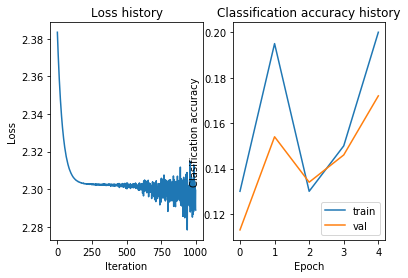

iteration [0 / 1000] : loss = 6.786079
iteration [1 / 1000] : loss = 2.540447
iteration [2 / 1000] : loss = 2.319774
iteration [3 / 1000] : loss = 2.303827
iteration [4 / 1000] : loss = 2.302675
iteration [5 / 1000] : loss = 2.302592
iteration [6 / 1000] : loss = 2.302585
iteration [7 / 1000] : loss = 2.302585
iteration [8 / 1000] : loss = 2.302584
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302586
iteration [12 / 1000] : loss = 2.302586
iteration [13 / 1000] : loss = 2.302585
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302585
iteration [16 / 1000] : loss = 2.302585
iteration [17 / 1000] : loss = 2.302585
iteration [18 / 1000] : loss = 2.302585
iteration [19 / 1000] : loss = 2.302584
iteration [20 / 1000] : loss = 2.302585
iteration [21 / 1000] : loss = 2.302584
iteration [22 / 1000] : loss = 2.302586
iteration [23 / 1000] : loss = 2.302584
iteration [24 / 1000] : loss = 2.302585
iteration 

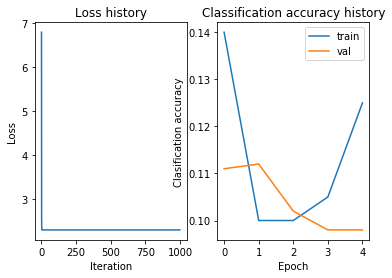

iteration [0 / 1000] : loss = 2.302595
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

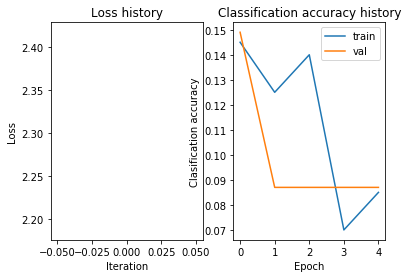

iteration [0 / 1000] : loss = 2.372021
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

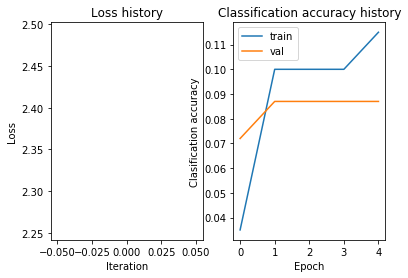

iteration [0 / 1000] : loss = 2.818259
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

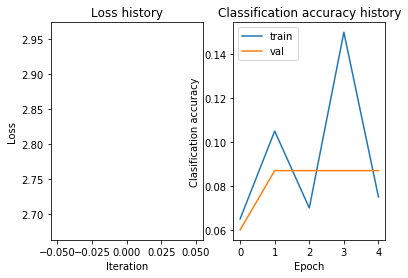

iteration [0 / 1000] : loss = 2.423666
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

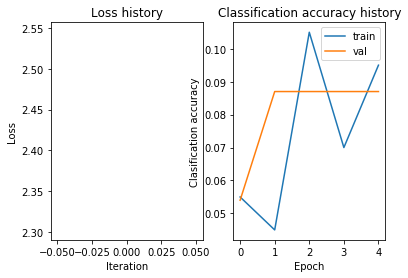

iteration [0 / 1000] : loss = 9.022270
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

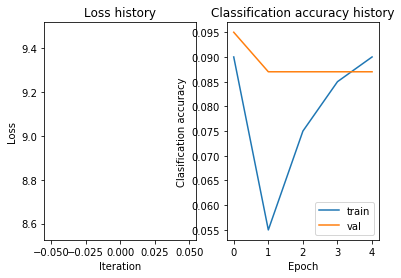

iteration [0 / 1000] : loss = 2.302604
iteration [1 / 1000] : loss = 2.302572
iteration [2 / 1000] : loss = 2.302565
iteration [3 / 1000] : loss = 2.302591
iteration [4 / 1000] : loss = 2.302575
iteration [5 / 1000] : loss = 2.302576
iteration [6 / 1000] : loss = 2.302572
iteration [7 / 1000] : loss = 2.302572
iteration [8 / 1000] : loss = 2.302563
iteration [9 / 1000] : loss = 2.302536
iteration [10 / 1000] : loss = 2.302551
iteration [11 / 1000] : loss = 2.302541
iteration [12 / 1000] : loss = 2.302550
iteration [13 / 1000] : loss = 2.302540
iteration [14 / 1000] : loss = 2.302558
iteration [15 / 1000] : loss = 2.302543
iteration [16 / 1000] : loss = 2.302519
iteration [17 / 1000] : loss = 2.302552
iteration [18 / 1000] : loss = 2.302547
iteration [19 / 1000] : loss = 2.302519
iteration [20 / 1000] : loss = 2.302518
iteration [21 / 1000] : loss = 2.302518
iteration [22 / 1000] : loss = 2.302490
iteration [23 / 1000] : loss = 2.302502
iteration [24 / 1000] : loss = 2.302549
iteration 

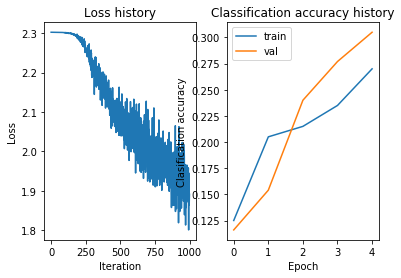

iteration [0 / 1000] : loss = 2.372164
iteration [1 / 1000] : loss = 2.371204
iteration [2 / 1000] : loss = 2.370339
iteration [3 / 1000] : loss = 2.369484
iteration [4 / 1000] : loss = 2.368603
iteration [5 / 1000] : loss = 2.367801
iteration [6 / 1000] : loss = 2.366972
iteration [7 / 1000] : loss = 2.366147
iteration [8 / 1000] : loss = 2.365319
iteration [9 / 1000] : loss = 2.364504
iteration [10 / 1000] : loss = 2.363732
iteration [11 / 1000] : loss = 2.362953
iteration [12 / 1000] : loss = 2.362177
iteration [13 / 1000] : loss = 2.361447
iteration [14 / 1000] : loss = 2.360667
iteration [15 / 1000] : loss = 2.359929
iteration [16 / 1000] : loss = 2.359230
iteration [17 / 1000] : loss = 2.358486
iteration [18 / 1000] : loss = 2.357781
iteration [19 / 1000] : loss = 2.357083
iteration [20 / 1000] : loss = 2.356362
iteration [21 / 1000] : loss = 2.355712
iteration [22 / 1000] : loss = 2.355026
iteration [23 / 1000] : loss = 2.354315
iteration [24 / 1000] : loss = 2.353682
iteration 

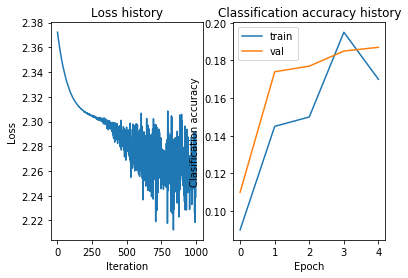

iteration [0 / 1000] : loss = 2.823089
iteration [1 / 1000] : loss = 2.772286
iteration [2 / 1000] : loss = 2.728620
iteration [3 / 1000] : loss = 2.689078
iteration [4 / 1000] : loss = 2.653154
iteration [5 / 1000] : loss = 2.620622
iteration [6 / 1000] : loss = 2.591088
iteration [7 / 1000] : loss = 2.564260
iteration [8 / 1000] : loss = 2.539975
iteration [9 / 1000] : loss = 2.517907
iteration [10 / 1000] : loss = 2.497912
iteration [11 / 1000] : loss = 2.479789
iteration [12 / 1000] : loss = 2.463327
iteration [13 / 1000] : loss = 2.448393
iteration [14 / 1000] : loss = 2.434855
iteration [15 / 1000] : loss = 2.422564
iteration [16 / 1000] : loss = 2.411428
iteration [17 / 1000] : loss = 2.401307
iteration [18 / 1000] : loss = 2.392144
iteration [19 / 1000] : loss = 2.383824
iteration [20 / 1000] : loss = 2.376283
iteration [21 / 1000] : loss = 2.369440
iteration [22 / 1000] : loss = 2.363229
iteration [23 / 1000] : loss = 2.357605
iteration [24 / 1000] : loss = 2.352492
iteration 

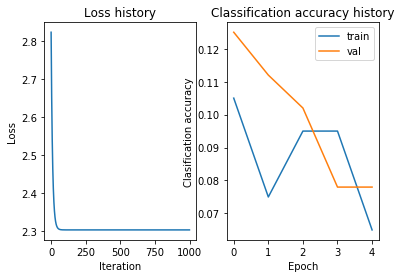

iteration [0 / 1000] : loss = 2.424347
iteration [1 / 1000] : loss = 2.421529
iteration [2 / 1000] : loss = 2.418867
iteration [3 / 1000] : loss = 2.416286
iteration [4 / 1000] : loss = 2.413790
iteration [5 / 1000] : loss = 2.411329
iteration [6 / 1000] : loss = 2.408926
iteration [7 / 1000] : loss = 2.406570
iteration [8 / 1000] : loss = 2.404277
iteration [9 / 1000] : loss = 2.401999
iteration [10 / 1000] : loss = 2.399849
iteration [11 / 1000] : loss = 2.397655
iteration [12 / 1000] : loss = 2.395556
iteration [13 / 1000] : loss = 2.393492
iteration [14 / 1000] : loss = 2.391484
iteration [15 / 1000] : loss = 2.389533
iteration [16 / 1000] : loss = 2.387603
iteration [17 / 1000] : loss = 2.385737
iteration [18 / 1000] : loss = 2.383890
iteration [19 / 1000] : loss = 2.382077
iteration [20 / 1000] : loss = 2.380317
iteration [21 / 1000] : loss = 2.378613
iteration [22 / 1000] : loss = 2.376931
iteration [23 / 1000] : loss = 2.375279
iteration [24 / 1000] : loss = 2.373679
iteration 

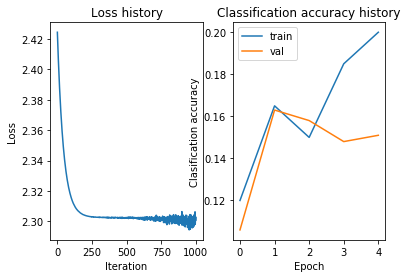

iteration [0 / 1000] : loss = 9.018570
iteration [1 / 1000] : loss = 3.130322
iteration [2 / 1000] : loss = 2.424335
iteration [3 / 1000] : loss = 2.320493
iteration [4 / 1000] : loss = 2.305219
iteration [5 / 1000] : loss = 2.302973
iteration [6 / 1000] : loss = 2.302642
iteration [7 / 1000] : loss = 2.302594
iteration [8 / 1000] : loss = 2.302587
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302586
iteration [11 / 1000] : loss = 2.302585
iteration [12 / 1000] : loss = 2.302585
iteration [13 / 1000] : loss = 2.302584
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302584
iteration [16 / 1000] : loss = 2.302585
iteration [17 / 1000] : loss = 2.302586
iteration [18 / 1000] : loss = 2.302584
iteration [19 / 1000] : loss = 2.302584
iteration [20 / 1000] : loss = 2.302586
iteration [21 / 1000] : loss = 2.302585
iteration [22 / 1000] : loss = 2.302585
iteration [23 / 1000] : loss = 2.302585
iteration [24 / 1000] : loss = 2.302586
iteration 

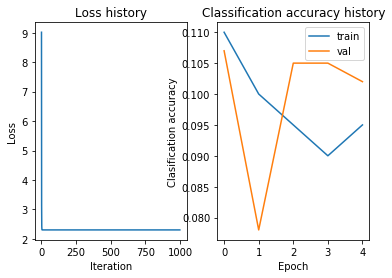

iteration [0 / 1000] : loss = 2.302627
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

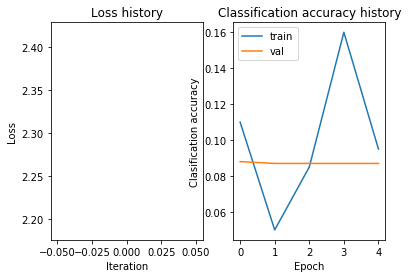

iteration [0 / 1000] : loss = 2.372314
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

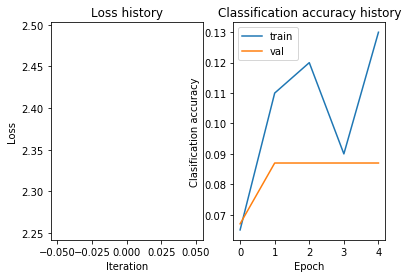

iteration [0 / 1000] : loss = 2.822210
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

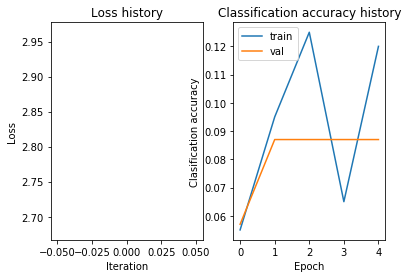

iteration [0 / 1000] : loss = 2.423931
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

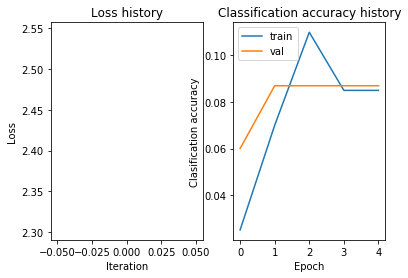

iteration [0 / 1000] : loss = 9.017868
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

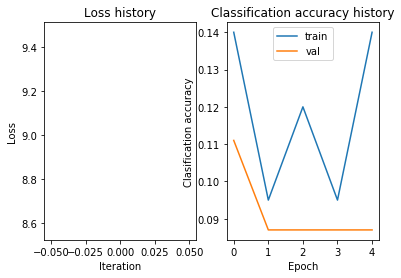

iteration [0 / 1000] : loss = 2.302595
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

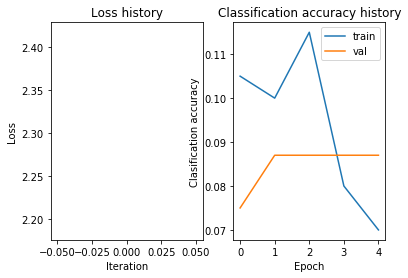

iteration [0 / 1000] : loss = 2.372153
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

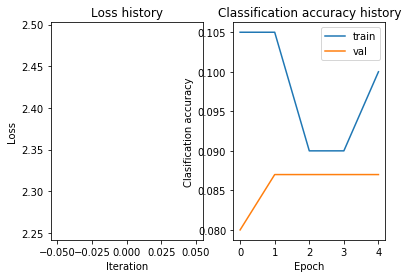

iteration [0 / 1000] : loss = 2.826042
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

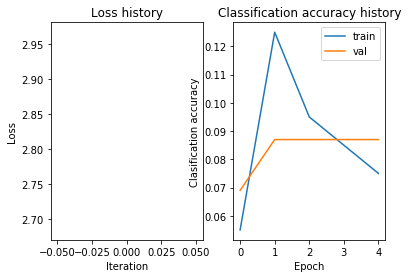

iteration [0 / 1000] : loss = 2.423839
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

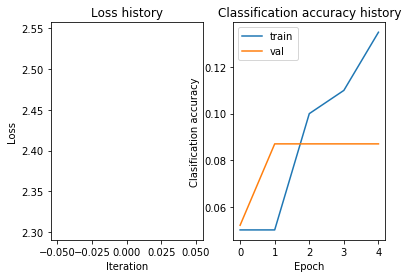

iteration [0 / 1000] : loss = 9.041479
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

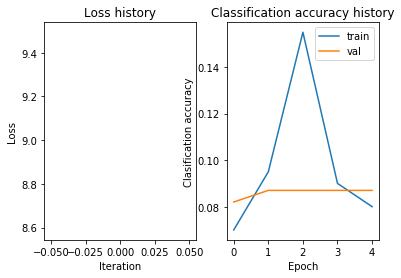

iteration [0 / 1000] : loss = 2.302618
iteration [1 / 1000] : loss = 2.302604
iteration [2 / 1000] : loss = 2.302615
iteration [3 / 1000] : loss = 2.302585
iteration [4 / 1000] : loss = 2.302616
iteration [5 / 1000] : loss = 2.302609
iteration [6 / 1000] : loss = 2.302593
iteration [7 / 1000] : loss = 2.302569
iteration [8 / 1000] : loss = 2.302613
iteration [9 / 1000] : loss = 2.302566
iteration [10 / 1000] : loss = 2.302568
iteration [11 / 1000] : loss = 2.302579
iteration [12 / 1000] : loss = 2.302544
iteration [13 / 1000] : loss = 2.302524
iteration [14 / 1000] : loss = 2.302554
iteration [15 / 1000] : loss = 2.302560
iteration [16 / 1000] : loss = 2.302532
iteration [17 / 1000] : loss = 2.302531
iteration [18 / 1000] : loss = 2.302501
iteration [19 / 1000] : loss = 2.302504
iteration [20 / 1000] : loss = 2.302510
iteration [21 / 1000] : loss = 2.302527
iteration [22 / 1000] : loss = 2.302517
iteration [23 / 1000] : loss = 2.302461
iteration [24 / 1000] : loss = 2.302510
iteration 

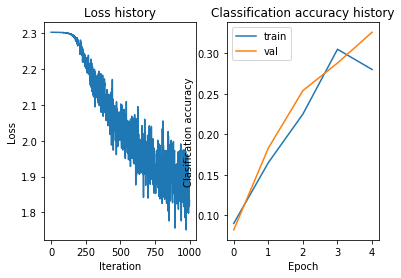

iteration [0 / 1000] : loss = 2.372374
iteration [1 / 1000] : loss = 2.371270
iteration [2 / 1000] : loss = 2.370237
iteration [3 / 1000] : loss = 2.369211
iteration [4 / 1000] : loss = 2.368207
iteration [5 / 1000] : loss = 2.367217
iteration [6 / 1000] : loss = 2.366221
iteration [7 / 1000] : loss = 2.365284
iteration [8 / 1000] : loss = 2.364349
iteration [9 / 1000] : loss = 2.363417
iteration [10 / 1000] : loss = 2.362493
iteration [11 / 1000] : loss = 2.361572
iteration [12 / 1000] : loss = 2.360713
iteration [13 / 1000] : loss = 2.359790
iteration [14 / 1000] : loss = 2.358963
iteration [15 / 1000] : loss = 2.358102
iteration [16 / 1000] : loss = 2.357275
iteration [17 / 1000] : loss = 2.356434
iteration [18 / 1000] : loss = 2.355657
iteration [19 / 1000] : loss = 2.354800
iteration [20 / 1000] : loss = 2.354017
iteration [21 / 1000] : loss = 2.353259
iteration [22 / 1000] : loss = 2.352506
iteration [23 / 1000] : loss = 2.351699
iteration [24 / 1000] : loss = 2.350981
iteration 

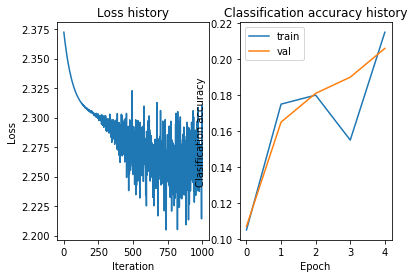

iteration [0 / 1000] : loss = 2.820116
iteration [1 / 1000] : loss = 2.760459
iteration [2 / 1000] : loss = 2.710253
iteration [3 / 1000] : loss = 2.665563
iteration [4 / 1000] : loss = 2.625738
iteration [5 / 1000] : loss = 2.590301
iteration [6 / 1000] : loss = 2.558755
iteration [7 / 1000] : loss = 2.530658
iteration [8 / 1000] : loss = 2.505649
iteration [9 / 1000] : loss = 2.483377
iteration [10 / 1000] : loss = 2.463557
iteration [11 / 1000] : loss = 2.445900
iteration [12 / 1000] : loss = 2.430192
iteration [13 / 1000] : loss = 2.416202
iteration [14 / 1000] : loss = 2.403736
iteration [15 / 1000] : loss = 2.392647
iteration [16 / 1000] : loss = 2.382773
iteration [17 / 1000] : loss = 2.373977
iteration [18 / 1000] : loss = 2.366150
iteration [19 / 1000] : loss = 2.359177
iteration [20 / 1000] : loss = 2.352971
iteration [21 / 1000] : loss = 2.347449
iteration [22 / 1000] : loss = 2.342530
iteration [23 / 1000] : loss = 2.338150
iteration [24 / 1000] : loss = 2.334249
iteration 

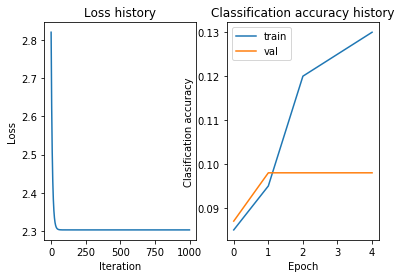

iteration [0 / 1000] : loss = 2.424460
iteration [1 / 1000] : loss = 2.421048
iteration [2 / 1000] : loss = 2.417973
iteration [3 / 1000] : loss = 2.414960
iteration [4 / 1000] : loss = 2.411993
iteration [5 / 1000] : loss = 2.409150
iteration [6 / 1000] : loss = 2.406325
iteration [7 / 1000] : loss = 2.403608
iteration [8 / 1000] : loss = 2.400961
iteration [9 / 1000] : loss = 2.398381
iteration [10 / 1000] : loss = 2.395870
iteration [11 / 1000] : loss = 2.393413
iteration [12 / 1000] : loss = 2.391055
iteration [13 / 1000] : loss = 2.388715
iteration [14 / 1000] : loss = 2.386499
iteration [15 / 1000] : loss = 2.384286
iteration [16 / 1000] : loss = 2.382120
iteration [17 / 1000] : loss = 2.380049
iteration [18 / 1000] : loss = 2.378002
iteration [19 / 1000] : loss = 2.376039
iteration [20 / 1000] : loss = 2.374121
iteration [21 / 1000] : loss = 2.372231
iteration [22 / 1000] : loss = 2.370435
iteration [23 / 1000] : loss = 2.368636
iteration [24 / 1000] : loss = 2.366899
iteration 

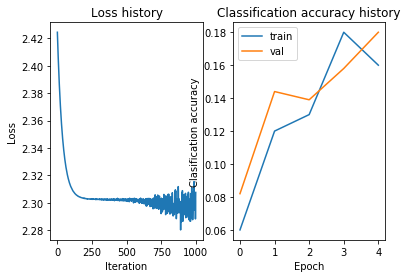

iteration [0 / 1000] : loss = 9.062729
iteration [1 / 1000] : loss = 2.661218
iteration [2 / 1000] : loss = 2.328501
iteration [3 / 1000] : loss = 2.304458
iteration [4 / 1000] : loss = 2.302720
iteration [5 / 1000] : loss = 2.302595
iteration [6 / 1000] : loss = 2.302587
iteration [7 / 1000] : loss = 2.302585
iteration [8 / 1000] : loss = 2.302585
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302585
iteration [12 / 1000] : loss = 2.302585
iteration [13 / 1000] : loss = 2.302585
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302584
iteration [16 / 1000] : loss = 2.302586
iteration [17 / 1000] : loss = 2.302585
iteration [18 / 1000] : loss = 2.302586
iteration [19 / 1000] : loss = 2.302586
iteration [20 / 1000] : loss = 2.302586
iteration [21 / 1000] : loss = 2.302587
iteration [22 / 1000] : loss = 2.302584
iteration [23 / 1000] : loss = 2.302585
iteration [24 / 1000] : loss = 2.302585
iteration 

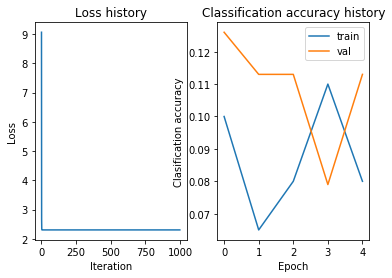

iteration [0 / 1000] : loss = 2.302624
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

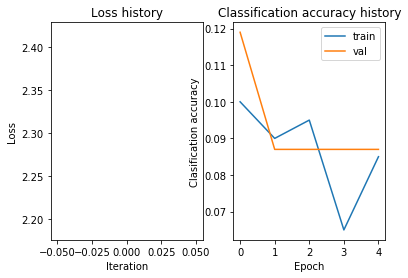

iteration [0 / 1000] : loss = 2.395264
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

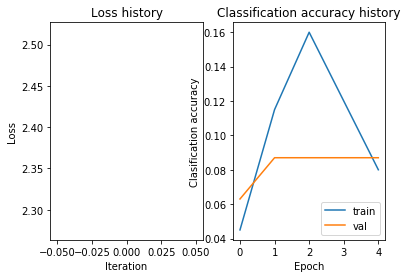

iteration [0 / 1000] : loss = 2.994038
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

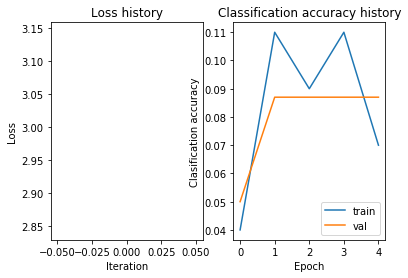

iteration [0 / 1000] : loss = 2.464423
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

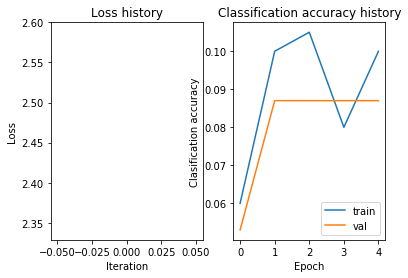

iteration [0 / 1000] : loss = 11.295873
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

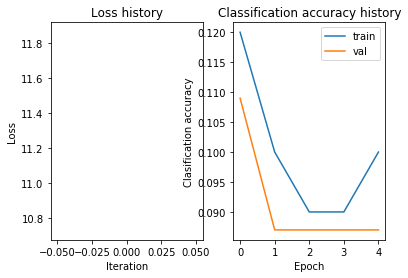

iteration [0 / 1000] : loss = 2.302592
iteration [1 / 1000] : loss = 2.302592
iteration [2 / 1000] : loss = 2.302573
iteration [3 / 1000] : loss = 2.302564
iteration [4 / 1000] : loss = 2.302542
iteration [5 / 1000] : loss = 2.302544
iteration [6 / 1000] : loss = 2.302538
iteration [7 / 1000] : loss = 2.302550
iteration [8 / 1000] : loss = 2.302514
iteration [9 / 1000] : loss = 2.302535
iteration [10 / 1000] : loss = 2.302540
iteration [11 / 1000] : loss = 2.302552
iteration [12 / 1000] : loss = 2.302516
iteration [13 / 1000] : loss = 2.302507
iteration [14 / 1000] : loss = 2.302511
iteration [15 / 1000] : loss = 2.302460
iteration [16 / 1000] : loss = 2.302536
iteration [17 / 1000] : loss = 2.302462
iteration [18 / 1000] : loss = 2.302512
iteration [19 / 1000] : loss = 2.302504
iteration [20 / 1000] : loss = 2.302515
iteration [21 / 1000] : loss = 2.302444
iteration [22 / 1000] : loss = 2.302448
iteration [23 / 1000] : loss = 2.302483
iteration [24 / 1000] : loss = 2.302452
iteration 

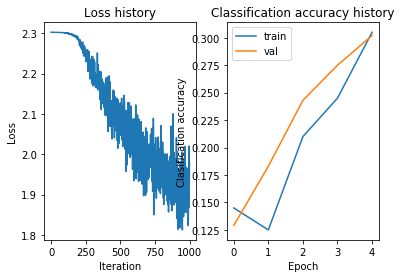

iteration [0 / 1000] : loss = 2.395391
iteration [1 / 1000] : loss = 2.394140
iteration [2 / 1000] : loss = 2.392981
iteration [3 / 1000] : loss = 2.391835
iteration [4 / 1000] : loss = 2.390705
iteration [5 / 1000] : loss = 2.389547
iteration [6 / 1000] : loss = 2.388475
iteration [7 / 1000] : loss = 2.387363
iteration [8 / 1000] : loss = 2.386302
iteration [9 / 1000] : loss = 2.385239
iteration [10 / 1000] : loss = 2.384178
iteration [11 / 1000] : loss = 2.383127
iteration [12 / 1000] : loss = 2.382115
iteration [13 / 1000] : loss = 2.381076
iteration [14 / 1000] : loss = 2.380084
iteration [15 / 1000] : loss = 2.379103
iteration [16 / 1000] : loss = 2.378118
iteration [17 / 1000] : loss = 2.377157
iteration [18 / 1000] : loss = 2.376231
iteration [19 / 1000] : loss = 2.375272
iteration [20 / 1000] : loss = 2.374368
iteration [21 / 1000] : loss = 2.373454
iteration [22 / 1000] : loss = 2.372558
iteration [23 / 1000] : loss = 2.371649
iteration [24 / 1000] : loss = 2.370782
iteration 

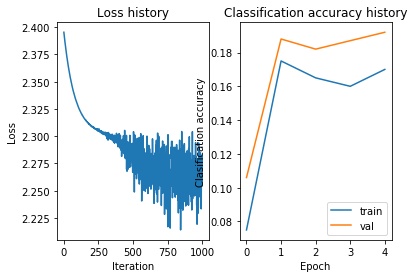

iteration [0 / 1000] : loss = 2.995495
iteration [1 / 1000] : loss = 2.927864
iteration [2 / 1000] : loss = 2.869776
iteration [3 / 1000] : loss = 2.817082
iteration [4 / 1000] : loss = 2.769292
iteration [5 / 1000] : loss = 2.725950
iteration [6 / 1000] : loss = 2.686627
iteration [7 / 1000] : loss = 2.650962
iteration [8 / 1000] : loss = 2.618602
iteration [9 / 1000] : loss = 2.589237
iteration [10 / 1000] : loss = 2.562620
iteration [11 / 1000] : loss = 2.538473
iteration [12 / 1000] : loss = 2.516552
iteration [13 / 1000] : loss = 2.496686
iteration [14 / 1000] : loss = 2.478658
iteration [15 / 1000] : loss = 2.462311
iteration [16 / 1000] : loss = 2.447471
iteration [17 / 1000] : loss = 2.434020
iteration [18 / 1000] : loss = 2.421810
iteration [19 / 1000] : loss = 2.410733
iteration [20 / 1000] : loss = 2.400698
iteration [21 / 1000] : loss = 2.391581
iteration [22 / 1000] : loss = 2.383313
iteration [23 / 1000] : loss = 2.375819
iteration [24 / 1000] : loss = 2.369018
iteration 

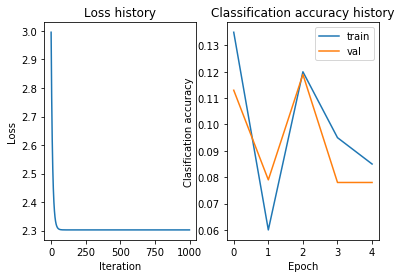

iteration [0 / 1000] : loss = 2.464202
iteration [1 / 1000] : loss = 2.460433
iteration [2 / 1000] : loss = 2.456939
iteration [3 / 1000] : loss = 2.453519
iteration [4 / 1000] : loss = 2.450197
iteration [5 / 1000] : loss = 2.446894
iteration [6 / 1000] : loss = 2.443709
iteration [7 / 1000] : loss = 2.440588
iteration [8 / 1000] : loss = 2.437576
iteration [9 / 1000] : loss = 2.434566
iteration [10 / 1000] : loss = 2.431649
iteration [11 / 1000] : loss = 2.428797
iteration [12 / 1000] : loss = 2.425989
iteration [13 / 1000] : loss = 2.423264
iteration [14 / 1000] : loss = 2.420597
iteration [15 / 1000] : loss = 2.417959
iteration [16 / 1000] : loss = 2.415442
iteration [17 / 1000] : loss = 2.412935
iteration [18 / 1000] : loss = 2.410514
iteration [19 / 1000] : loss = 2.408081
iteration [20 / 1000] : loss = 2.405774
iteration [21 / 1000] : loss = 2.403463
iteration [22 / 1000] : loss = 2.401279
iteration [23 / 1000] : loss = 2.399089
iteration [24 / 1000] : loss = 2.396929
iteration 

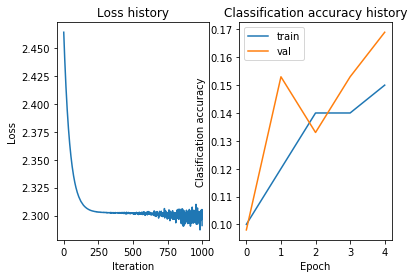

iteration [0 / 1000] : loss = 11.268466
iteration [1 / 1000] : loss = 3.407625
iteration [2 / 1000] : loss = 2.465121
iteration [3 / 1000] : loss = 2.326491
iteration [4 / 1000] : loss = 2.306101
iteration [5 / 1000] : loss = 2.303102
iteration [6 / 1000] : loss = 2.302661
iteration [7 / 1000] : loss = 2.302596
iteration [8 / 1000] : loss = 2.302586
iteration [9 / 1000] : loss = 2.302586
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302584
iteration [12 / 1000] : loss = 2.302585
iteration [13 / 1000] : loss = 2.302585
iteration [14 / 1000] : loss = 2.302584
iteration [15 / 1000] : loss = 2.302586
iteration [16 / 1000] : loss = 2.302584
iteration [17 / 1000] : loss = 2.302585
iteration [18 / 1000] : loss = 2.302584
iteration [19 / 1000] : loss = 2.302586
iteration [20 / 1000] : loss = 2.302585
iteration [21 / 1000] : loss = 2.302584
iteration [22 / 1000] : loss = 2.302584
iteration [23 / 1000] : loss = 2.302587
iteration [24 / 1000] : loss = 2.302586
iteration

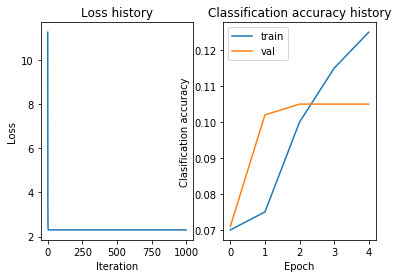

iteration [0 / 1000] : loss = 2.302611
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

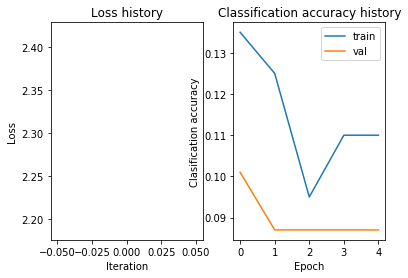

iteration [0 / 1000] : loss = 2.395145
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

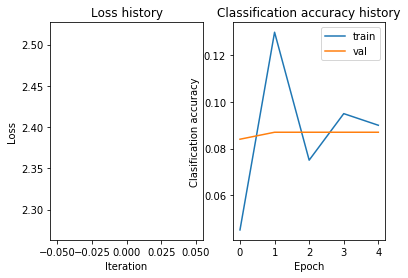

iteration [0 / 1000] : loss = 2.992766
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

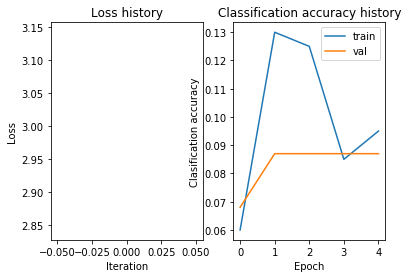

iteration [0 / 1000] : loss = 2.464063
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

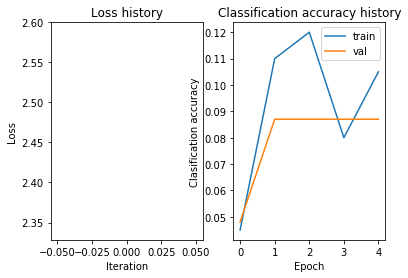

iteration [0 / 1000] : loss = 11.303895
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

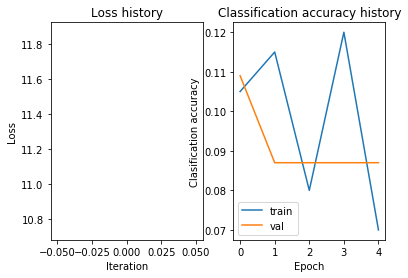

iteration [0 / 1000] : loss = 2.302663
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

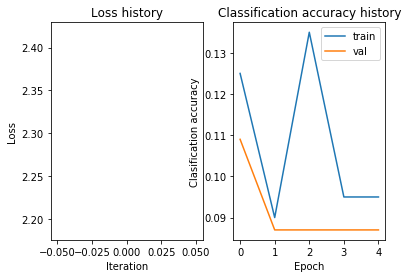

iteration [0 / 1000] : loss = 2.395042
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

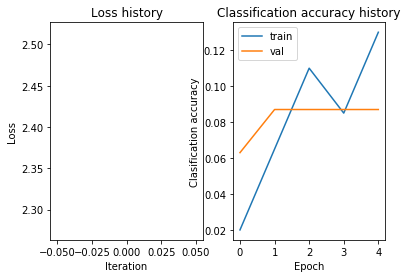

iteration [0 / 1000] : loss = 2.992161
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

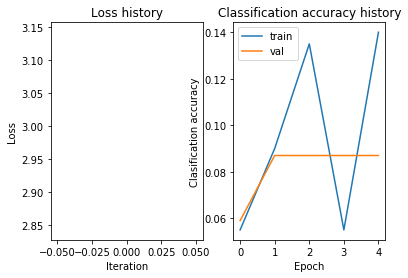

iteration [0 / 1000] : loss = 2.463964
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

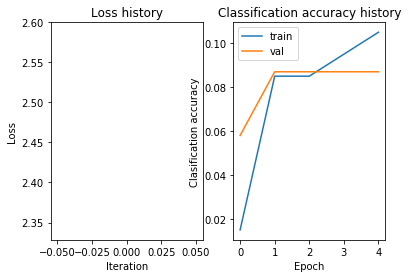

iteration [0 / 1000] : loss = 11.251260
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

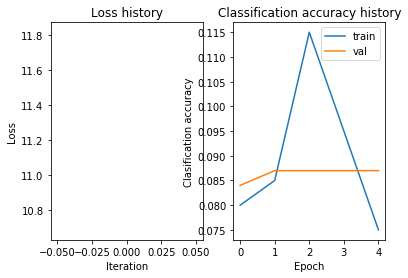

iteration [0 / 1000] : loss = 2.302591
iteration [1 / 1000] : loss = 2.302575
iteration [2 / 1000] : loss = 2.302590
iteration [3 / 1000] : loss = 2.302584
iteration [4 / 1000] : loss = 2.302583
iteration [5 / 1000] : loss = 2.302583
iteration [6 / 1000] : loss = 2.302570
iteration [7 / 1000] : loss = 2.302568
iteration [8 / 1000] : loss = 2.302592
iteration [9 / 1000] : loss = 2.302596
iteration [10 / 1000] : loss = 2.302562
iteration [11 / 1000] : loss = 2.302523
iteration [12 / 1000] : loss = 2.302519
iteration [13 / 1000] : loss = 2.302544
iteration [14 / 1000] : loss = 2.302552
iteration [15 / 1000] : loss = 2.302527
iteration [16 / 1000] : loss = 2.302528
iteration [17 / 1000] : loss = 2.302481
iteration [18 / 1000] : loss = 2.302478
iteration [19 / 1000] : loss = 2.302471
iteration [20 / 1000] : loss = 2.302528
iteration [21 / 1000] : loss = 2.302474
iteration [22 / 1000] : loss = 2.302413
iteration [23 / 1000] : loss = 2.302461
iteration [24 / 1000] : loss = 2.302511
iteration 

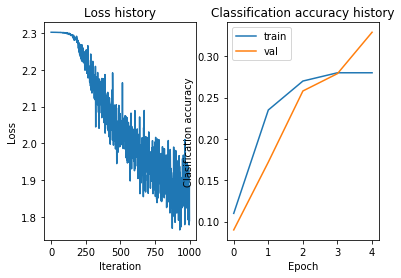

iteration [0 / 1000] : loss = 2.395267
iteration [1 / 1000] : loss = 2.393784
iteration [2 / 1000] : loss = 2.392397
iteration [3 / 1000] : loss = 2.391054
iteration [4 / 1000] : loss = 2.389688
iteration [5 / 1000] : loss = 2.388422
iteration [6 / 1000] : loss = 2.387102
iteration [7 / 1000] : loss = 2.385822
iteration [8 / 1000] : loss = 2.384557
iteration [9 / 1000] : loss = 2.383311
iteration [10 / 1000] : loss = 2.382151
iteration [11 / 1000] : loss = 2.380905
iteration [12 / 1000] : loss = 2.379697
iteration [13 / 1000] : loss = 2.378548
iteration [14 / 1000] : loss = 2.377414
iteration [15 / 1000] : loss = 2.376268
iteration [16 / 1000] : loss = 2.375173
iteration [17 / 1000] : loss = 2.374086
iteration [18 / 1000] : loss = 2.373001
iteration [19 / 1000] : loss = 2.371940
iteration [20 / 1000] : loss = 2.370911
iteration [21 / 1000] : loss = 2.369856
iteration [22 / 1000] : loss = 2.368825
iteration [23 / 1000] : loss = 2.367865
iteration [24 / 1000] : loss = 2.366862
iteration 

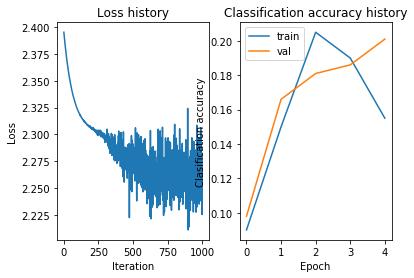

iteration [0 / 1000] : loss = 2.994688
iteration [1 / 1000] : loss = 2.914928
iteration [2 / 1000] : loss = 2.847753
iteration [3 / 1000] : loss = 2.787993
iteration [4 / 1000] : loss = 2.734748
iteration [5 / 1000] : loss = 2.687354
iteration [6 / 1000] : loss = 2.645173
iteration [7 / 1000] : loss = 2.607603
iteration [8 / 1000] : loss = 2.574148
iteration [9 / 1000] : loss = 2.544363
iteration [10 / 1000] : loss = 2.517846
iteration [11 / 1000] : loss = 2.494247
iteration [12 / 1000] : loss = 2.473225
iteration [13 / 1000] : loss = 2.454518
iteration [14 / 1000] : loss = 2.437862
iteration [15 / 1000] : loss = 2.423022
iteration [16 / 1000] : loss = 2.409816
iteration [17 / 1000] : loss = 2.398054
iteration [18 / 1000] : loss = 2.387588
iteration [19 / 1000] : loss = 2.378267
iteration [20 / 1000] : loss = 2.369971
iteration [21 / 1000] : loss = 2.362582
iteration [22 / 1000] : loss = 2.355998
iteration [23 / 1000] : loss = 2.350145
iteration [24 / 1000] : loss = 2.344930
iteration 

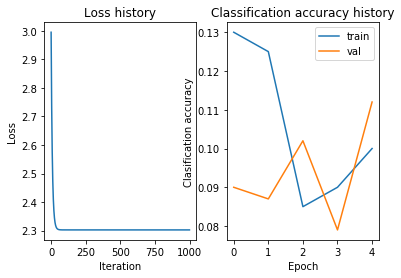

iteration [0 / 1000] : loss = 2.464020
iteration [1 / 1000] : loss = 2.459594
iteration [2 / 1000] : loss = 2.455470
iteration [3 / 1000] : loss = 2.451438
iteration [4 / 1000] : loss = 2.447546
iteration [5 / 1000] : loss = 2.443752
iteration [6 / 1000] : loss = 2.440025
iteration [7 / 1000] : loss = 2.436448
iteration [8 / 1000] : loss = 2.432938
iteration [9 / 1000] : loss = 2.429505
iteration [10 / 1000] : loss = 2.426173
iteration [11 / 1000] : loss = 2.422945
iteration [12 / 1000] : loss = 2.419785
iteration [13 / 1000] : loss = 2.416727
iteration [14 / 1000] : loss = 2.413701
iteration [15 / 1000] : loss = 2.410805
iteration [16 / 1000] : loss = 2.407967
iteration [17 / 1000] : loss = 2.405188
iteration [18 / 1000] : loss = 2.402512
iteration [19 / 1000] : loss = 2.399924
iteration [20 / 1000] : loss = 2.397377
iteration [21 / 1000] : loss = 2.394880
iteration [22 / 1000] : loss = 2.392449
iteration [23 / 1000] : loss = 2.390067
iteration [24 / 1000] : loss = 2.387802
iteration 

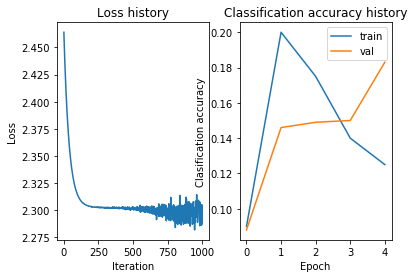

iteration [0 / 1000] : loss = 11.291710
iteration [1 / 1000] : loss = 2.779466
iteration [2 / 1000] : loss = 2.337047
iteration [3 / 1000] : loss = 2.305075
iteration [4 / 1000] : loss = 2.302765
iteration [5 / 1000] : loss = 2.302599
iteration [6 / 1000] : loss = 2.302586
iteration [7 / 1000] : loss = 2.302584
iteration [8 / 1000] : loss = 2.302586
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302586
iteration [12 / 1000] : loss = 2.302584
iteration [13 / 1000] : loss = 2.302587
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302585
iteration [16 / 1000] : loss = 2.302586
iteration [17 / 1000] : loss = 2.302587
iteration [18 / 1000] : loss = 2.302584
iteration [19 / 1000] : loss = 2.302584
iteration [20 / 1000] : loss = 2.302584
iteration [21 / 1000] : loss = 2.302584
iteration [22 / 1000] : loss = 2.302585
iteration [23 / 1000] : loss = 2.302584
iteration [24 / 1000] : loss = 2.302586
iteration

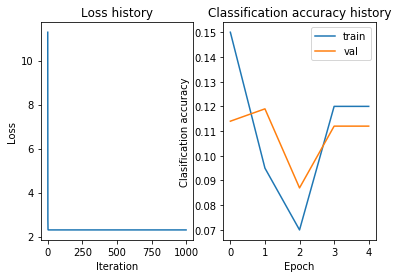

iteration [0 / 1000] : loss = 2.302595
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

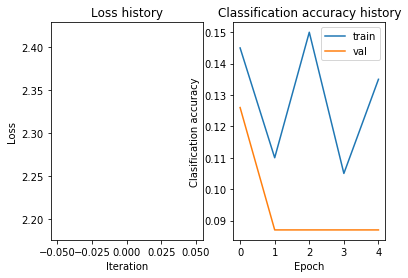

iteration [0 / 1000] : loss = 2.418119
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

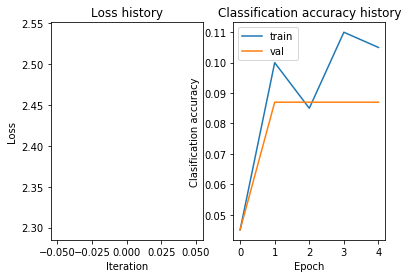

iteration [0 / 1000] : loss = 3.169102
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

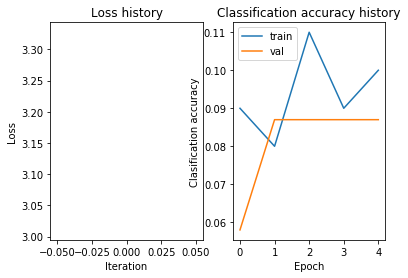

iteration [0 / 1000] : loss = 2.504400
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

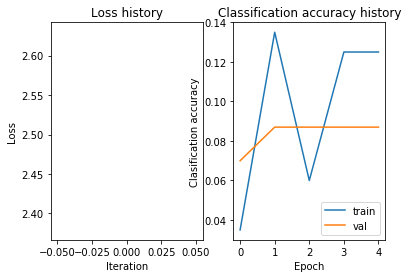

iteration [0 / 1000] : loss = 13.567768
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = nan
iteration [20 / 1000] : loss = nan
iteration [21 / 1000] : loss = nan
iteration [22 / 1000] : loss = nan
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

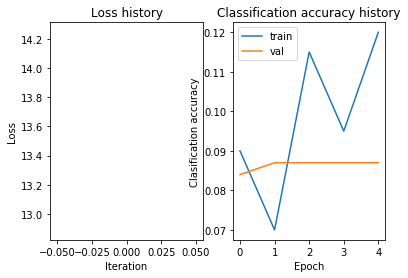

iteration [0 / 1000] : loss = 2.302639
iteration [1 / 1000] : loss = 2.302632
iteration [2 / 1000] : loss = 2.302633
iteration [3 / 1000] : loss = 2.302603
iteration [4 / 1000] : loss = 2.302606
iteration [5 / 1000] : loss = 2.302648
iteration [6 / 1000] : loss = 2.302608
iteration [7 / 1000] : loss = 2.302594
iteration [8 / 1000] : loss = 2.302557
iteration [9 / 1000] : loss = 2.302626
iteration [10 / 1000] : loss = 2.302575
iteration [11 / 1000] : loss = 2.302615
iteration [12 / 1000] : loss = 2.302577
iteration [13 / 1000] : loss = 2.302544
iteration [14 / 1000] : loss = 2.302538
iteration [15 / 1000] : loss = 2.302514
iteration [16 / 1000] : loss = 2.302571
iteration [17 / 1000] : loss = 2.302557
iteration [18 / 1000] : loss = 2.302535
iteration [19 / 1000] : loss = 2.302477
iteration [20 / 1000] : loss = 2.302534
iteration [21 / 1000] : loss = 2.302512
iteration [22 / 1000] : loss = 2.302518
iteration [23 / 1000] : loss = 2.302544
iteration [24 / 1000] : loss = 2.302475
iteration 

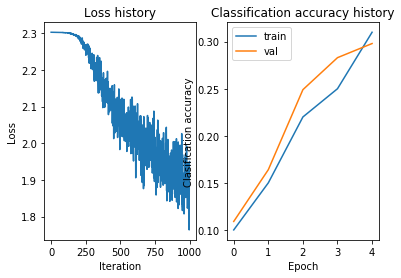

iteration [0 / 1000] : loss = 2.418683
iteration [1 / 1000] : loss = 2.417155
iteration [2 / 1000] : loss = 2.415696
iteration [3 / 1000] : loss = 2.414243
iteration [4 / 1000] : loss = 2.412835
iteration [5 / 1000] : loss = 2.411435
iteration [6 / 1000] : loss = 2.410006
iteration [7 / 1000] : loss = 2.408657
iteration [8 / 1000] : loss = 2.407303
iteration [9 / 1000] : loss = 2.405994
iteration [10 / 1000] : loss = 2.404650
iteration [11 / 1000] : loss = 2.403380
iteration [12 / 1000] : loss = 2.402064
iteration [13 / 1000] : loss = 2.400787
iteration [14 / 1000] : loss = 2.399549
iteration [15 / 1000] : loss = 2.398357
iteration [16 / 1000] : loss = 2.397098
iteration [17 / 1000] : loss = 2.395874
iteration [18 / 1000] : loss = 2.394698
iteration [19 / 1000] : loss = 2.393546
iteration [20 / 1000] : loss = 2.392373
iteration [21 / 1000] : loss = 2.391281
iteration [22 / 1000] : loss = 2.390071
iteration [23 / 1000] : loss = 2.388989
iteration [24 / 1000] : loss = 2.387904
iteration 

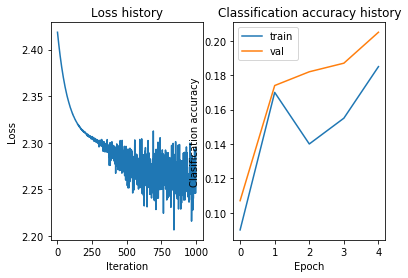

iteration [0 / 1000] : loss = 3.170105
iteration [1 / 1000] : loss = 3.085344
iteration [2 / 1000] : loss = 3.012646
iteration [3 / 1000] : loss = 2.946701
iteration [4 / 1000] : loss = 2.886877
iteration [5 / 1000] : loss = 2.832609
iteration [6 / 1000] : loss = 2.783350
iteration [7 / 1000] : loss = 2.738722
iteration [8 / 1000] : loss = 2.698213
iteration [9 / 1000] : loss = 2.661461
iteration [10 / 1000] : loss = 2.628115
iteration [11 / 1000] : loss = 2.597885
iteration [12 / 1000] : loss = 2.570455
iteration [13 / 1000] : loss = 2.545580
iteration [14 / 1000] : loss = 2.523004
iteration [15 / 1000] : loss = 2.502530
iteration [16 / 1000] : loss = 2.483964
iteration [17 / 1000] : loss = 2.467120
iteration [18 / 1000] : loss = 2.451837
iteration [19 / 1000] : loss = 2.437972
iteration [20 / 1000] : loss = 2.425396
iteration [21 / 1000] : loss = 2.413994
iteration [22 / 1000] : loss = 2.403645
iteration [23 / 1000] : loss = 2.394259
iteration [24 / 1000] : loss = 2.385745
iteration 

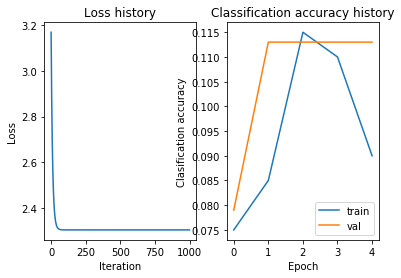

iteration [0 / 1000] : loss = 2.504831
iteration [1 / 1000] : loss = 2.500146
iteration [2 / 1000] : loss = 2.495784
iteration [3 / 1000] : loss = 2.491482
iteration [4 / 1000] : loss = 2.487300
iteration [5 / 1000] : loss = 2.483231
iteration [6 / 1000] : loss = 2.479221
iteration [7 / 1000] : loss = 2.475318
iteration [8 / 1000] : loss = 2.471511
iteration [9 / 1000] : loss = 2.467770
iteration [10 / 1000] : loss = 2.464113
iteration [11 / 1000] : loss = 2.460524
iteration [12 / 1000] : loss = 2.457016
iteration [13 / 1000] : loss = 2.453605
iteration [14 / 1000] : loss = 2.450274
iteration [15 / 1000] : loss = 2.446988
iteration [16 / 1000] : loss = 2.443832
iteration [17 / 1000] : loss = 2.440661
iteration [18 / 1000] : loss = 2.437653
iteration [19 / 1000] : loss = 2.434653
iteration [20 / 1000] : loss = 2.431731
iteration [21 / 1000] : loss = 2.428891
iteration [22 / 1000] : loss = 2.426088
iteration [23 / 1000] : loss = 2.423343
iteration [24 / 1000] : loss = 2.420667
iteration 

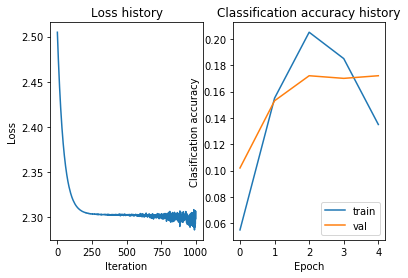

iteration [0 / 1000] : loss = 13.441531
iteration [1 / 1000] : loss = 3.675452
iteration [2 / 1000] : loss = 2.504516
iteration [3 / 1000] : loss = 2.332286
iteration [4 / 1000] : loss = 2.306954
iteration [5 / 1000] : loss = 2.303228
iteration [6 / 1000] : loss = 2.302680
iteration [7 / 1000] : loss = 2.302599
iteration [8 / 1000] : loss = 2.302587
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302585
iteration [11 / 1000] : loss = 2.302584
iteration [12 / 1000] : loss = 2.302584
iteration [13 / 1000] : loss = 2.302586
iteration [14 / 1000] : loss = 2.302584
iteration [15 / 1000] : loss = 2.302585
iteration [16 / 1000] : loss = 2.302586
iteration [17 / 1000] : loss = 2.302585
iteration [18 / 1000] : loss = 2.302586
iteration [19 / 1000] : loss = 2.302585
iteration [20 / 1000] : loss = 2.302584
iteration [21 / 1000] : loss = 2.302585
iteration [22 / 1000] : loss = 2.302586
iteration [23 / 1000] : loss = 2.302585
iteration [24 / 1000] : loss = 2.302585
iteration

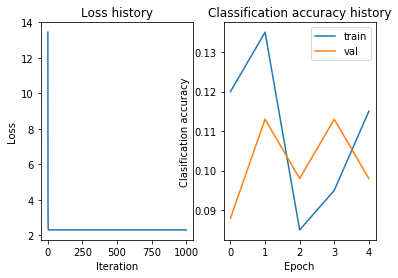

iteration [0 / 1000] : loss = 2.302599
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

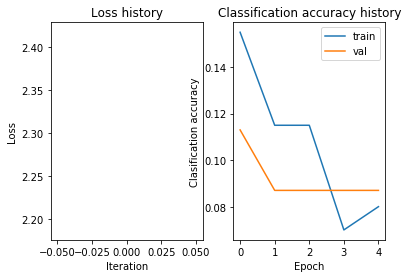

iteration [0 / 1000] : loss = 2.418269
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

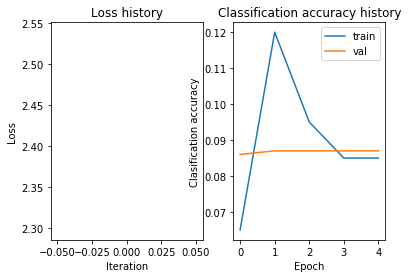

iteration [0 / 1000] : loss = 3.168800
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

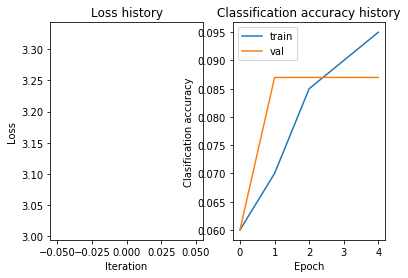

iteration [0 / 1000] : loss = 2.504653
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

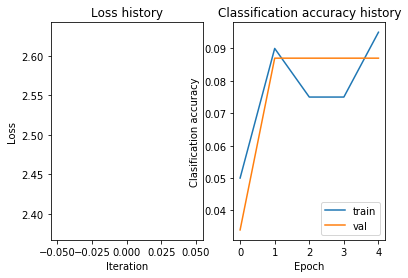

iteration [0 / 1000] : loss = 13.542713
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = nan
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

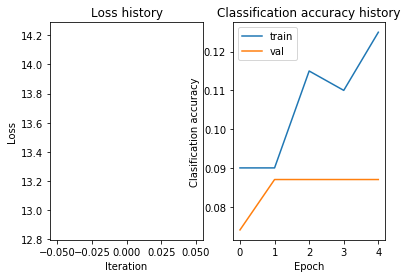

iteration [0 / 1000] : loss = 2.302599
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

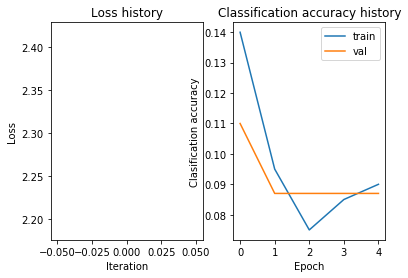

iteration [0 / 1000] : loss = 2.418312
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

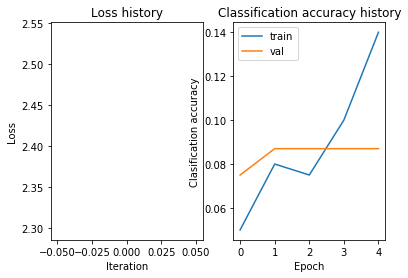

iteration [0 / 1000] : loss = 3.166232
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : l

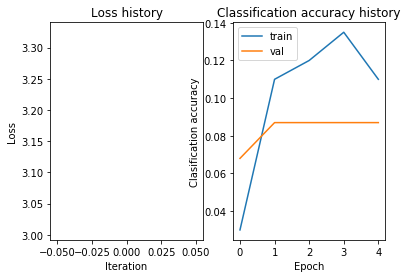

iteration [0 / 1000] : loss = 2.505233
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = inf
iteration [25 / 1000] : loss = inf
iteration [26 / 1000] : loss = inf
iteration [27 / 1000] : loss = inf
iteration [28 / 1000] : l

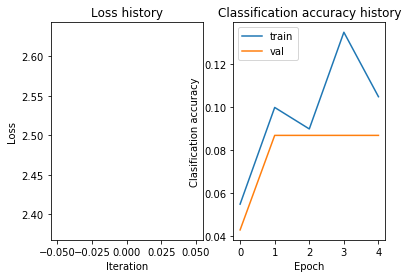

iteration [0 / 1000] : loss = 13.518091
iteration [1 / 1000] : loss = inf
iteration [2 / 1000] : loss = inf
iteration [3 / 1000] : loss = inf
iteration [4 / 1000] : loss = inf
iteration [5 / 1000] : loss = inf
iteration [6 / 1000] : loss = inf
iteration [7 / 1000] : loss = inf
iteration [8 / 1000] : loss = inf
iteration [9 / 1000] : loss = inf
iteration [10 / 1000] : loss = inf
iteration [11 / 1000] : loss = inf
iteration [12 / 1000] : loss = inf
iteration [13 / 1000] : loss = inf
iteration [14 / 1000] : loss = inf
iteration [15 / 1000] : loss = inf
iteration [16 / 1000] : loss = inf
iteration [17 / 1000] : loss = inf
iteration [18 / 1000] : loss = inf
iteration [19 / 1000] : loss = inf
iteration [20 / 1000] : loss = inf
iteration [21 / 1000] : loss = inf
iteration [22 / 1000] : loss = inf
iteration [23 / 1000] : loss = inf
iteration [24 / 1000] : loss = nan
iteration [25 / 1000] : loss = nan
iteration [26 / 1000] : loss = nan
iteration [27 / 1000] : loss = nan
iteration [28 / 1000] : 

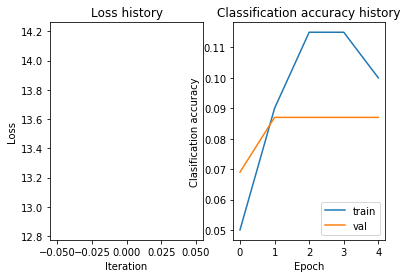

iteration [0 / 1000] : loss = 2.302659
iteration [1 / 1000] : loss = 2.302661
iteration [2 / 1000] : loss = 2.302659
iteration [3 / 1000] : loss = 2.302670
iteration [4 / 1000] : loss = 2.302589
iteration [5 / 1000] : loss = 2.302626
iteration [6 / 1000] : loss = 2.302615
iteration [7 / 1000] : loss = 2.302585
iteration [8 / 1000] : loss = 2.302584
iteration [9 / 1000] : loss = 2.302621
iteration [10 / 1000] : loss = 2.302586
iteration [11 / 1000] : loss = 2.302605
iteration [12 / 1000] : loss = 2.302552
iteration [13 / 1000] : loss = 2.302565
iteration [14 / 1000] : loss = 2.302541
iteration [15 / 1000] : loss = 2.302542
iteration [16 / 1000] : loss = 2.302527
iteration [17 / 1000] : loss = 2.302540
iteration [18 / 1000] : loss = 2.302511
iteration [19 / 1000] : loss = 2.302470
iteration [20 / 1000] : loss = 2.302522
iteration [21 / 1000] : loss = 2.302520
iteration [22 / 1000] : loss = 2.302523
iteration [23 / 1000] : loss = 2.302470
iteration [24 / 1000] : loss = 2.302484
iteration 

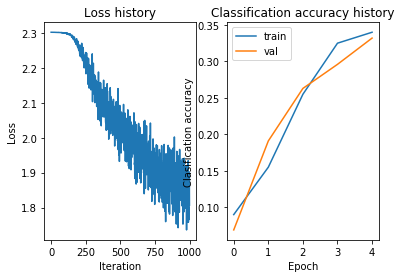

iteration [0 / 1000] : loss = 2.418455
iteration [1 / 1000] : loss = 2.416567
iteration [2 / 1000] : loss = 2.414850
iteration [3 / 1000] : loss = 2.413189
iteration [4 / 1000] : loss = 2.411517
iteration [5 / 1000] : loss = 2.409853
iteration [6 / 1000] : loss = 2.408230
iteration [7 / 1000] : loss = 2.406614
iteration [8 / 1000] : loss = 2.405084
iteration [9 / 1000] : loss = 2.403512
iteration [10 / 1000] : loss = 2.401983
iteration [11 / 1000] : loss = 2.400475
iteration [12 / 1000] : loss = 2.398992
iteration [13 / 1000] : loss = 2.397565
iteration [14 / 1000] : loss = 2.396118
iteration [15 / 1000] : loss = 2.394710
iteration [16 / 1000] : loss = 2.393306
iteration [17 / 1000] : loss = 2.391948
iteration [18 / 1000] : loss = 2.390609
iteration [19 / 1000] : loss = 2.389259
iteration [20 / 1000] : loss = 2.387959
iteration [21 / 1000] : loss = 2.386653
iteration [22 / 1000] : loss = 2.385371
iteration [23 / 1000] : loss = 2.384142
iteration [24 / 1000] : loss = 2.382908
iteration 

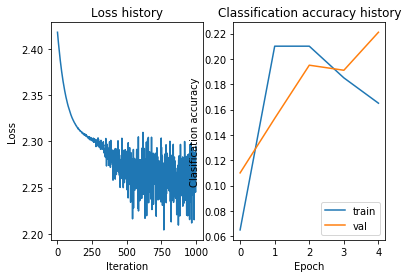

iteration [0 / 1000] : loss = 3.169727
iteration [1 / 1000] : loss = 3.069802
iteration [2 / 1000] : loss = 2.985629
iteration [3 / 1000] : loss = 2.910742
iteration [4 / 1000] : loss = 2.844030
iteration [5 / 1000] : loss = 2.784673
iteration [6 / 1000] : loss = 2.731795
iteration [7 / 1000] : loss = 2.684738
iteration [8 / 1000] : loss = 2.642823
iteration [9 / 1000] : loss = 2.605508
iteration [10 / 1000] : loss = 2.572288
iteration [11 / 1000] : loss = 2.542723
iteration [12 / 1000] : loss = 2.516379
iteration [13 / 1000] : loss = 2.492934
iteration [14 / 1000] : loss = 2.472076
iteration [15 / 1000] : loss = 2.453490
iteration [16 / 1000] : loss = 2.436938
iteration [17 / 1000] : loss = 2.422203
iteration [18 / 1000] : loss = 2.409090
iteration [19 / 1000] : loss = 2.397411
iteration [20 / 1000] : loss = 2.387009
iteration [21 / 1000] : loss = 2.377751
iteration [22 / 1000] : loss = 2.369512
iteration [23 / 1000] : loss = 2.362171
iteration [24 / 1000] : loss = 2.355641
iteration 

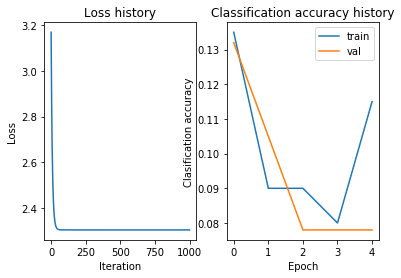

iteration [0 / 1000] : loss = 2.504973
iteration [1 / 1000] : loss = 2.499368
iteration [2 / 1000] : loss = 2.494269
iteration [3 / 1000] : loss = 2.489198
iteration [4 / 1000] : loss = 2.484334
iteration [5 / 1000] : loss = 2.479583
iteration [6 / 1000] : loss = 2.474916
iteration [7 / 1000] : loss = 2.470397
iteration [8 / 1000] : loss = 2.465995
iteration [9 / 1000] : loss = 2.461749
iteration [10 / 1000] : loss = 2.457520
iteration [11 / 1000] : loss = 2.453482
iteration [12 / 1000] : loss = 2.449523
iteration [13 / 1000] : loss = 2.445664
iteration [14 / 1000] : loss = 2.441925
iteration [15 / 1000] : loss = 2.438303
iteration [16 / 1000] : loss = 2.434692
iteration [17 / 1000] : loss = 2.431250
iteration [18 / 1000] : loss = 2.427873
iteration [19 / 1000] : loss = 2.424618
iteration [20 / 1000] : loss = 2.421374
iteration [21 / 1000] : loss = 2.418263
iteration [22 / 1000] : loss = 2.415244
iteration [23 / 1000] : loss = 2.412275
iteration [24 / 1000] : loss = 2.409415
iteration 

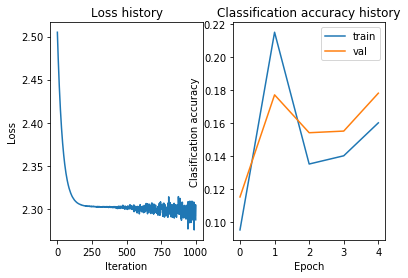

iteration [0 / 1000] : loss = 13.506204
iteration [1 / 1000] : loss = 2.896973
iteration [2 / 1000] : loss = 2.345537
iteration [3 / 1000] : loss = 2.305689
iteration [4 / 1000] : loss = 2.302809
iteration [5 / 1000] : loss = 2.302601
iteration [6 / 1000] : loss = 2.302586
iteration [7 / 1000] : loss = 2.302586
iteration [8 / 1000] : loss = 2.302585
iteration [9 / 1000] : loss = 2.302585
iteration [10 / 1000] : loss = 2.302586
iteration [11 / 1000] : loss = 2.302585
iteration [12 / 1000] : loss = 2.302586
iteration [13 / 1000] : loss = 2.302586
iteration [14 / 1000] : loss = 2.302585
iteration [15 / 1000] : loss = 2.302585
iteration [16 / 1000] : loss = 2.302585
iteration [17 / 1000] : loss = 2.302586
iteration [18 / 1000] : loss = 2.302586
iteration [19 / 1000] : loss = 2.302585
iteration [20 / 1000] : loss = 2.302586
iteration [21 / 1000] : loss = 2.302585
iteration [22 / 1000] : loss = 2.302586
iteration [23 / 1000] : loss = 2.302586
iteration [24 / 1000] : loss = 2.302585
iteration

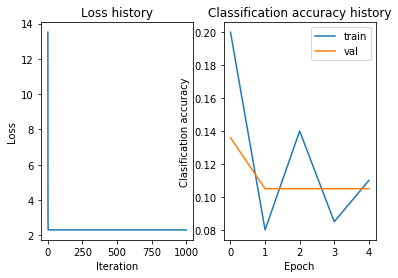

TRAINING procedure OVER..............
STOP.
...............RESULTS.....................
h1_size: 75    lr: 27804.920035    reg: 2910.656306    val_acc = 0.087000
h1_size: 75    lr: 884.890088    reg: 224.602688    val_acc = 0.087000
h1_size: 50    lr: 0.000111    reg: 0.008598    val_acc = 0.299000
h1_size: 100    lr: 27804.920035    reg: 0.008598    val_acc = 0.087000
h1_size: 125    lr: 27804.920035    reg: 30.068170    val_acc = 0.087000
h1_size: 75    lr: 884.890088    reg: 30.068170    val_acc = 0.087000
h1_size: 125    lr: 0.000111    reg: 224.602688    val_acc = 0.113000
h1_size: 125    lr: 884.890088    reg: 52.473280    val_acc = 0.087000
h1_size: 125    lr: 27804.920035    reg: 224.602688    val_acc = 0.087000
h1_size: 100    lr: 0.000111    reg: 30.068170    val_acc = 0.190000
h1_size: 125    lr: 1119.348857    reg: 52.473280    val_acc = 0.087000
h1_size: 125    lr: 0.000132    reg: 52.473280    val_acc = 0.178000
h1_size: 75    lr: 0.000111    reg: 224.602688    val_acc = 

In [11]:
from modules.classifiers.tune_hyperparams import tune_hyperparams
best_net = tune_hyperparams(X=X_train, y=y_train, X_val=X_val, y_val=y_val, num_train_epochs=5, verbose=True)

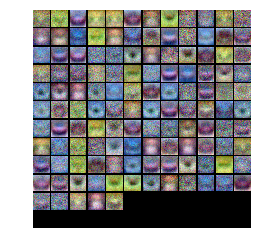

In [13]:
# visualize the weights of the best network
#print(best_val_acc)
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.341


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1, 2